In [23]:
import pandas as pd
import os
import geopandas as gpd
import geoplot
import geoplot.crs as gcrs
import rasterio
import matplotlib.pyplot as plt
import time
from rasterstats import zonal_stats
from osgeo import gdal
import numpy as np
import sys
import geopandas as gdp

sys.path.append(os.path.abspath("c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\analytics\\sandbox\\notebooks\\crop_fires\\Functions"))
import Preprocess

In [123]:
os.chdir('c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\src\\data_preprocessing\\tsdm\\')
mandal_boundaries = gpd.read_file('Mandal_Boundary.shp')
mandal_boundaries = mandal_boundaries.reset_index()

os.chdir('c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\src\\data_preprocessing\\tsdm\\')
district_boundaries = gpd.read_file('District_Boundary.shp')
district_boundaries = district_boundaries.reset_index()

os.chdir('c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\src\\data_preprocessing\\base_geojson')
shape_telangana = gpd.read_file('TL_state_shapefile_for_clip.geojson')
shape_telangana = shape_telangana.explode()

#os.chdir('c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\analytics\\sandbox\\notebooks\\crop_fires\\DPPD_Jesse\\Data')
#one_km_grid = gpd.read_file('telangana_1km_grid.geojson')
#one_km_grid = one_km_grid.reset_index()

#os.chdir('c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\analytics\\sandbox\\notebooks\\crop_fires\\DPPD_Jesse\\Data')
#ten_km_grid = gpd.read_file('telangana_10km_grid.geojson')
#ten_km_grid = ten_km_grid.reset_index()

In [ ]:
import importlib
importlib.reload(Preprocess)

In [ ]:
stat_df_PM25 = Preprocess.read_tiffs(mandal_boundaries, 'Mandal', 'PM2.5', 3, 5, 6, 10, True, 'mean')
stat_df_NO2 = Preprocess.read_tiffs(mandal_boundaries, 'Mandal',  'NO2', 3, 5, 6, 10, True, 'mean')
stat_df_SSM = Preprocess.read_tiffs(mandal_boundaries, 'Mandal', 'SSM', 9, 11, 4, 8, True, 'mean')
stat_df_SSM_median = Preprocess.read_tiffs(mandal_boundaries, 'Mandal', 'SSM', 9, 11, 4, 8, True, 'median')
stat_df_BA_sum = Preprocess.read_tiffs(mandal_boundaries, 'Mandal', 'BA_monthly', 5, 7, 0, 4, False, 'sum')


In [173]:
stat_df_SSM_median = Preprocess.read_tiffs(mandal_boundaries, 'Mandal', 'SSM', 9, 11, 4, 8, True, 'median')

In [186]:
stat_df_SSM_mean = Preprocess.read_tiffs(mandal_boundaries, 'Mandal', 'SSM', 9, 11, 4, 8, True, 'mean')
stat_df_SSM_max = Preprocess.read_tiffs(mandal_boundaries, 'Mandal', 'SSM', 9, 11, 4, 8, True, 'max')
stat_df_SSM_min = Preprocess.read_tiffs(mandal_boundaries, 'Mandal', 'SSM', 9, 11, 4, 8, True, 'min')
stat_df_SSM_percentile_90 = Preprocess.read_tiffs(mandal_boundaries, 'Mandal', 'SSM', 9, 11, 4, 8, True, 'percentile_90')

In [187]:
stat_df_BA_mean = Preprocess.read_tiffs(mandal_boundaries, 'Mandal', 'BA_monthly', 5, 7, 0, 4, False, 'mean')
stat_df_BA_median = Preprocess.read_tiffs(mandal_boundaries, 'Mandal', 'BA_monthly', 5, 7, 0, 4, False, 'median')
stat_df_PRE_sum = Preprocess.read_tiffs(mandal_boundaries, 'Mandal', 'PRE_monthly', 5, 7, 0, 4, True, 'sum')


In [ ]:
stat_df_ST_mean = Preprocess.read_tiffs(mandal_boundaries, 'Mandal', 'ST', 9, 11, 4, 8, True, 'mean')
stat_df_ST_percentile_90 = Preprocess.read_tiffs(mandal_boundaries, 'Mandal', 'ST', 9, 11, 4, 8, True, 'percentile_90')
stat_df_ST_max = Preprocess.read_tiffs(mandal_boundaries, 'Mandal', 'ST', 9, 11, 4, 8, True, 'max')
stat_df_ST_min = Preprocess.read_tiffs(mandal_boundaries, 'Mandal', 'ST', 9, 11, 4, 8, True, 'min')
stat_df_ST_median = Preprocess.read_tiffs(mandal_boundaries, 'Mandal', 'ST', 9, 11, 4, 8, True, 'median')

In [ ]:
stat_df_AOT_mean = Preprocess.read_tiffs(mandal_boundaries, 'Mandal', 'AOT', 3, 5, 6, 10, True, 'mean')
stat_df_AOT_percentile_90 = Preprocess.read_tiffs(mandal_boundaries, 'Mandal', 'AOT', 3, 5, 6, 10, True, 'percentile_90')
stat_df_AOT_max = Preprocess.read_tiffs(mandal_boundaries, 'Mandal', 'AOT', 3, 5, 6, 10, True, 'max')
stat_df_AOT_min = Preprocess.read_tiffs(mandal_boundaries, 'Mandal', 'AOT', 3, 5, 6, 10, True, 'min')
stat_df_AOT_median = Preprocess.read_tiffs(mandal_boundaries, 'Mandal', 'AOT', 3, 5, 6, 10,  True, 'median')

In [ ]:
stat_df_PRE_mean = Preprocess.read_tiffs(mandal_boundaries, 'Mandal', 'PRE_monthly', 5, 7, 0, 4, True, 'mean')
stat_df_PRE_percentile_90 = Preprocess.read_tiffs(mandal_boundaries, 'Mandal', 'PRE_monthly', 5, 7, 0, 4, True, 'percentile_90')
stat_df_PRE_max = Preprocess.read_tiffs(mandal_boundaries, 'Mandal', 'PRE_monthly', 5, 7, 0, 4, True, 'max')
stat_df_PRE_min = Preprocess.read_tiffs(mandal_boundaries, 'Mandal', 'PRE_monthly', 5, 7, 0, 4, True, 'min')
stat_df_PRE_median = Preprocess.read_tiffs(mandal_boundaries, 'Mandal', 'PRE_monthly', 5, 7, 0, 4, True, 'median')

In [ ]:
stat_df_PRE_median = Preprocess.read_tiffs(mandal_boundaries, 'Mandal', 'PRE_monthly', 5, 7, 0, 4, True, 'median')
stat_df_AOT_median = Preprocess.read_tiffs(mandal_boundaries, 'Mandal', 'AOT', 3, 5, 6, 10,  True, 'median')
stat_df_ST_median = Preprocess.read_tiffs(mandal_boundaries, 'Mandal', 'ST', 9, 11, 4, 8, True, 'median')

RWI

In [ ]:
os.chdir('C:\\Users\\Jesse\\OneDrive\\Documenten\\Data_Thesis\\RWI_vector')

stat_RWI_df = gpd.read_file('01-01-2021.geojson')
stat_RWI_df = stat_RWI_df.reset_index()

stat_df_RWI_percentile_90 = Preprocess.read_tiffs(mandal_boundaries, 'Mandal', 'RWI', 3, 5, 6, 10, False, 'percentile_90')
stat_df_RWI_percentile_90 = stat_df_RWI_percentile_90.rename(columns = {'Value': 'RWI_percentile_90'})

stat_RWI_df['RWI_mean'] = 0
stat_RWI_df['RWI_min'] = 0
stat_RWI_df['RWI_max'] = 0
stat_RWI_df['RWI_median'] = 0

for i in range (0, len(stat_RWI_df)):
    stat_RWI_df['RWI_mean'].iloc[i] = stat_RWI_df['zonalstat'].iloc[i]['mean']
    stat_RWI_df['RWI_min'].iloc[i] = stat_RWI_df['zonalstat'].iloc[i]['min']
    stat_RWI_df['RWI_max'].iloc[i] = stat_RWI_df['zonalstat'].iloc[i]['max']
    stat_RWI_df['RWI_median'].iloc[i] = stat_RWI_df['zonalstat'].iloc[i]['median']
 
stat_df_RWI = pd.merge(stat_df_RWI_percentile_90, stat_RWI_df[['index', 'RWI_mean', 'RWI_max', 'RWI_min', 'RWI_median']])

Population

In [ ]:
stat_df_POP_mean = Preprocess.read_tiffs(mandal_boundaries, 'Mandal', 'Population', 3, 5, 6, 10, False, 'mean')
stat_df_POP_median = Preprocess.read_tiffs(mandal_boundaries, 'Mandal', 'Population', 3, 5, 6, 10, False, 'median')

stat_df_POP_mean = stat_df_POP_mean.rename(columns = {'Value': 'POP_mean'})
stat_df_POP_median = stat_df_POP_median.rename(columns = {'Value': 'POP_median'})

Soil Type

In [ ]:
file_path = r'C:\\Users\\Jesse\\OneDrive\\Documenten\\Data_Thesis\\Soil Type\\soil_type.tif'
param = rasterio.open(file_path, mode = 'r')
# Assign raster values to a numpy nd array
param_array = param.read(1) # landuse corresponding to each rasterpixel, so we extracted the pixel values from the raster
# affine: 1: corresponds to the width of each pixel, 2: row rotation, 3: x-coordinate of the upper left pixel, 4: column rotation, 5: height of each pixel, 6: y-coordinate of the upper left pixel
affine = param.transform
param.meta
# Geographical coordinate reference system is used (4326)
# lulc.nodata # value which has been assigned for the nodata
mode = zonal_stats(mandal_boundaries.geometry, param_array, affine = param.transform, geojson_out = True, nodata = param.nodata, all_touched = False, stats = ['majority'])
# Extracting the landuse statistics from the list
mode_soiltype = []
i = 0
while i < len(mode):
    mode_soiltype.append(mode[i]['properties']['majority'])
    i = i + 1

Rural Areas

In [ ]:
file_path = r'C:\\Users\\Jesse\\OneDrive\\Documenten\\Data_Thesis\\Rural_areas\\urban_rural_catchment_areas.tif'
param = rasterio.open(file_path, mode = 'r')
# Assign raster values to a numpy nd array
param_array = param.read(1) # landuse corresponding to each rasterpixel, so we extracted the pixel values from the raster
# affine: 1: corresponds to the width of each pixel, 2: row rotation, 3: x-coordinate of the upper left pixel, 4: column rotation, 5: height of each pixel, 6: y-coordinate of the upper left pixel
affine = param.transform
param.meta
# Geographical coordinate reference system is used (4326)
# lulc.nodata # value which has been assigned for the nodata
mode = zonal_stats(mandal_boundaries.geometry, param_array, affine = param.transform, geojson_out = True, nodata = param.nodata, all_touched = False, stats = ['median'])
# Extracting the landuse statistics from the list
mode_rural_median = []
i = 0
while i < len(mode):
    mode_rural_median.append(mode[i]['properties']['median'])
    i = i + 1

Crop Area

In [ ]:
os.chdir('c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\analytics\\sandbox\\notebooks\\crop_fires\\Exploration\\Landuse_Analysis')

years = [2017, 2018]
mandals = mandal_boundaries[['index', 'Mandal_Nam', 'Dist_Name', 'geometry']]

for year in years:
    tiff = '01-01-'+str(year)+'.tif'
    lulc = rasterio.open(tiff, mode = 'r')
    lulc_array = lulc.read(1) # landuse corresponding to each rasterpixel, so we extracted the pixel values from the raster
    # affine: 1: corresponds to the width of each pixel, 2: row rotation, 3: x-coordinate of the upper left pixel, 4: column rotation, 5: height of each pixel, 6: y-coordinate of the upper left pixel
    affine = lulc.transform

    cmap = {1: 'Water', 2: 'Trees', 4: 'Flooded Vegetation', 5: 'Crops', 7: 'Built Area', 8: 'Bare Ground', 9: 'Snow/Ice', 10: 'Clouds', 11: 'Rangeland'}

    test = zonal_stats(mandals.geometry, lulc_array, affine = affine, geojson_out = True, nodata = lulc.nodata, stats = 'majority', categorical=True, category_map = cmap)

    mandals[str(year)+'-01-01 Crops']=0
    mandals[str(year)+'-01-01 Flooded Vegetation']=0
    mandals[str(year)+'-01-01 Trees']=0
    mandals[str(year)+'-01-01 Built Area']=0

    for i in range(0, len(test)):
        try:
            mandals[str(year)+'-01-01 Crops'].iloc[i] = test[i]['properties']['Crops'] 
        except:
            mandals[str(year)+'-01-01 Crops'].iloc[i] = 0
        try:
            mandals[str(year)+'-01-01 Flooded Vegetation'].iloc[i] = test[i]['properties']['Flooded Vegetation'] 
        except:
            mandals[str(year)+'-01-01 Flooded Vegetation'].iloc[i] = 0
        try:
            mandals[str(year)+'-01-01 Trees'].iloc[i] = test[i]['properties']['Trees'] 
        except:
            mandals[str(year)+'-01-01 Trees'].iloc[i]=0
        try:
            mandals[str(year)+'-01-01 Built Area'].iloc[i] = test[i]['properties']['Built Area'] 
        except:
            mandals[str(year)+'-01-01 Built Area'].iloc[i]=0
            
    mandals[str(year)+ ' Trees'] = mandals[str(year)+'-01-01 Trees'] * 0.0001
    mandals[str(year)+ ' Built Area'] = mandals[str(year)+'-01-01 Built Area'] * 0.0001
    mandals[str(year) + ' Crops'] = mandals[str(year)+'-01-01 Crops'] + mandals[str(year)+'-01-01 Flooded Vegetation']
    mandals[str(year) + ' Crops'] = mandals[str(year) + ' Crops'] * 0.0001


mandals['2016 Trees'] = mandals['2017 Trees']
mandals['2016 Crops'] = mandals['2017 Crops']
mandals['2016 Built Area'] = mandals['2017 Built Area']

In [ ]:
mandals_crops = mandals[['index', 'Mandal_Nam', 'Dist_Name', '2016 Crops', '2017 Crops', '2018 Crops']]
mandals_trees = mandals[['index', 'Mandal_Nam', 'Dist_Name', '2016 Trees', '2017 Trees', '2018 Trees']]
mandals_built_area = mandals[['index', 'Mandal_Nam', 'Dist_Name', '2016 Built Area', '2017 Built Area', '2018 Built Area']]

mandals_crops.columns = ['index', 'Mandal_Nam', 'Dist_Name', '2016', '2017', '2018']
mandals_trees.columns = ['index', 'Mandal_Nam', 'Dist_Name', '2016', '2017', '2018']
mandals_built_area.columns = ['index', 'Mandal_Nam', 'Dist_Name', '2016', '2017', '2018']

In [ ]:
crops = pd.melt(mandals_crops, id_vars=['index', 'Mandal_Nam', 'Dist_Name'], value_vars=mandals_crops.columns[3:])
crops = crops.rename(columns={"variable": 'Year', 'value': 'Crops'})

trees = pd.melt(mandals_trees, id_vars=['index', 'Mandal_Nam', 'Dist_Name'], value_vars=mandals_trees.columns[3:])
trees = trees.rename(columns={"variable": 'Year', 'value': 'Trees'})

built_area = pd.melt(mandals_built_area, id_vars=['index', 'Mandal_Nam', 'Dist_Name'], value_vars=mandals_built_area.columns[3:])
built_area = built_area.rename(columns={"variable": 'Year', 'value': 'Built Area'})

In [ ]:
Croparea_df_selected = pd.merge(crops, trees, on=['index', 'Year', 'Mandal_Nam', 'Dist_Name'])
Croparea_df_selected = pd.merge(Croparea_df_selected, built_area, on=['index', 'Year', 'Mandal_Nam', 'Dist_Name'])

Croparea_df_selected['Year'] = Croparea_df_selected['Year'].astype(int)

In [ ]:
os.chdir('c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\analytics\\sandbox\\notebooks\\crop_fires\\Data_csv\\results_csv')
Croparea_df_selected.to_csv('mandals_cropsarea.csv')

Combining Everything

In [ ]:
units = ['NO2', 'PM2.5', 'BA', 'SSM', 'SSM_median', 'ST_mean', 'ST_percentile_90', 'ST_max', 'ST_min', 'ST_median', 'AOT_mean', 'AOT_percentile_90', 'AOT_max', 'AOT_min', 'AOT_median', 'PRE_mean', 'PRE_percentile_90', 'PRE_max', 'PRE_min', 'PRE_median']
dataframes = [stat_df_NO2, stat_df_PM25, stat_df_BA, stat_df_SSM, stat_df_SSM_median, stat_df_ST_mean, stat_df_ST_percentile_90, stat_df_ST_max, stat_df_ST_min, stat_df_ST_median, stat_df_AOT_mean, stat_df_AOT_percentile_90, stat_df_AOT_max, stat_df_AOT_min, stat_df_AOT_median,
stat_df_PRE_mean, stat_df_PRE_percentile_90, stat_df_PRE_max, stat_df_PRE_min, stat_df_PRE_median]

for a in range(0, len(units)):
    dataframes[a] = dataframes[a].rename(columns={"Value": units[a]})

In [ ]:
df = dataframes[0]

for i in range(1, len(units)):
    df = pd.merge(df, dataframes[i], on=['ModifiedDateTime', 'index', 'Dist_Name', 'Mandal_Nam', 'geometry'], how = 'outer')

In [64]:
units = ['SSM_median']
dataframes = [stat_df_SSM_median]

for a in range(0, len(units)):
    dataframes[a] = dataframes[a].rename(columns={"Value": units[a]})

In [65]:
for i in range(0, len(units)):
    df = pd.merge(df, dataframes[i][['index', 'ModifiedDateTime', units[i]]], on=['ModifiedDateTime', 'index'], how = 'outer')

Combine POP, RWI, Soil Type, Crops, Trees, and Built Area seperately (Yearly Data)

In [63]:
df = pd.read_csv('data_tiffs.csv', index_col=0)
df['ModifiedDateTime'] = pd.to_datetime(df['ModifiedDateTime'])

In [ ]:
df['Year'] = df['ModifiedDateTime'].dt.year
df['Month'] = df['ModifiedDateTime'].dt.month

In [ ]:
stat_df_POP_mean['Year'] = stat_df_POP_mean['ModifiedDateTime'].dt.year
stat_df_POP_median['Year'] = stat_df_POP_median['ModifiedDateTime'].dt.year


In [ ]:
df = pd.merge(df, Croparea_df_selected[['Year', 'index', 'Crops', 'Trees', 'Built Area']], on = ['Year', 'index'], how='left')
df = pd.merge(df, stat_df_POP_mean[['Year', 'index', 'POP_mean']], on = ['Year', 'index'], how='left')
df = pd.merge(df, stat_df_POP_median[['Year', 'index', 'POP_median']], on = ['Year', 'index'], how='left')
df = pd.merge(df, stat_df_RWI[['index', 'RWI_mean', 'RWI_max', 'RWI_min', 'RWI_percentile_90', 'RWI_median']], on = ['index'], how='left')

In [ ]:
mandal_boundaries['time_to_rur_median'] = mode_rural_median
mandal_boundaries['Soil Type'] = mode_soiltype
mandal_boundaries['Soil Type'] = mandal_boundaries['Soil Type'].astype(int)

In [ ]:
cmap={3: 'Lithosols', 4: 'Pellic Luvisols', 13: 'Plinthic Luvisols', 17: 'Planosols', 27: 'Vertic Cambisols', 33: 'Eutric Nitosols', 37: 'Chromic Vertisols', 43: 'Chromic Luvisols'}

for soil in range(0, len(mandal_boundaries['Soil Type'])):
    mandal_boundaries['Soil Type'].iloc[soil] = cmap[mandal_boundaries['Soil Type'].iloc[soil]]

In [ ]:
mandal_boundaries['Soil Type'].unique()

In [ ]:
df = pd.merge(df, mandal_boundaries[['index', 'Soil Type']], on = ['index'], how='left')
df = pd.merge(df, mandal_boundaries[['index', 'time_to_rur_median']], on = ['index'], how='left')

Seasons

In [ ]:
df['Season'] = 0

for i in range(0, len(df)):
    if (df['Month'].iloc[i] == 4) | (df['Month'].iloc[i] == 5):
        df['Season'].iloc[i] = 'Rabi'
    elif (df['Month'].iloc[i] == 9) | (df['Month'].iloc[i] == 10):
        df['Season'].iloc[i] = 'Kharif' 
    else:
        df['Season'].iloc[i] = 'None'


Power Plants

In [141]:
os.chdir('C:\\Users\\Jesse\\OneDrive\\Documenten\\Data_Thesis\\PowerPlants')
power_plants = pd.read_excel('Coal Power Plants database_INDIA_FINAL.xlsx')
power_plants_tel = power_plants[power_plants['State']=='Telangana']

In [142]:
power_plants_tel = power_plants_tel[power_plants_tel['Commissioning year']<2019][['State','District', 'Location', 'Plant name ', 'Owner', 'Status', 'Capacity (MW)', 'Commissioning year', 'Latitude', 'Longitude', 2016, 2017, 2018]]

In [143]:
for i in range(0, len(power_plants_tel)):
    splitted_names = power_plants_tel['Plant name '].iloc[i].split()
    if splitted_names[-2] == 'Stage':
        power_plants_tel['Plant name '].iloc[i] = ' '.join(map(str, splitted_names[:-2]))

In [144]:
plants = []
max_capacities = []

for plant_name in power_plants_tel['Plant name '].unique():
    plant = power_plants_tel[power_plants_tel['Plant name '] == plant_name]
    plants.append(plant_name)
    max_cap = 0
    for capacity in range (0, len(plant)):
        if plant['Capacity (MW)'].iloc[capacity] > max_cap:
            max_cap = plant['Capacity (MW)'].iloc[capacity]

    max_capacities.append(max_cap)




In [145]:
unique_power_plants = power_plants_tel.groupby(['District', 'Location', 'Plant name ', 'Owner', 'Latitude', 'Longitude'])['State'].count().reset_index()

In [146]:
unique_power_plants['2016'] = 0
unique_power_plants['2017'] = 0
unique_power_plants['2018'] = 0 

for i in range(0, len(unique_power_plants)):
    for index in range(0, len(plants)):
        if (unique_power_plants['Plant name '].iloc[i] == plants[index]) & (plants[index] =='Pegadapalli Power Station (Jaipur Mandal Power Station)'):
            unique_power_plants['2017'].iloc[i] = max_capacities[index]
            unique_power_plants['2018'].iloc[i] = max_capacities[index]
        elif unique_power_plants['Plant name '].iloc[i] == plants[index]:
            unique_power_plants['2016'].iloc[i] = max_capacities[index]
            unique_power_plants['2017'].iloc[i] = max_capacities[index]
            unique_power_plants['2018'].iloc[i] = max_capacities[index]


In [147]:
del unique_power_plants['State']

In [148]:
gdp_power_plants_tel = gdp.GeoDataFrame(unique_power_plants, geometry=gdp.points_from_xy(unique_power_plants.Longitude, unique_power_plants.Latitude, crs='EPSG:4326'))

In [149]:
mandal_boundaries['Centroid'] = mandal_boundaries['geometry'].centroid.to_crs('EPSG:5234')
gdp_power_plants_tel['geometry_meters'] = gdp_power_plants_tel['geometry'].to_crs('EPSG:5234')

In [150]:
for plant in range(0, len(plants)):
    plan_split = plants[plant].split()
    mandal_boundaries[plants[plant]] = mandal_boundaries['Centroid'].distance(gdp_power_plants_tel['geometry_meters'].iloc[plant])


In [151]:
power_plants_matched = pd.melt(mandal_boundaries, id_vars=['index', 'Dist_Name', 'Mandal_Nam', 'geometry'], value_vars=mandal_boundaries.columns[-8:])
power_plants_matched = power_plants_matched.rename(columns = {'variable': 'Plant name ', 'value': 'Distance'})

In [152]:
df_power_plants = pd.merge(power_plants_matched, gdp_power_plants_tel[['Plant name ', '2016', '2017', '2018']], on = ['Plant name '], how='left')

In [153]:
df_power_plants['Distance'] = round(df_power_plants['Distance']/1000, 2)

In [158]:
df_power_plants['Score 2016'] = df_power_plants['2016'] / df_power_plants['Distance']
df_power_plants['Score 2017'] = df_power_plants['2017'] / df_power_plants['Distance']
df_power_plants['Score 2018'] = df_power_plants['2018'] / df_power_plants['Distance']

In [164]:
power_plant_scores = df_power_plants.groupby(['index', 'Dist_Name', 'Mandal_Nam'])['Score 2016', 'Score 2017', 'Score 2018'].sum().reset_index()

In [167]:
power_plant_scores = pd.melt(power_plant_scores,  id_vars=['index', 'Dist_Name', 'Mandal_Nam'], value_vars = ['Score 2016', 'Score 2017', 'Score 2018'])
power_plant_scores = power_plant_scores.rename(columns = {'variable': 'Year', 'value': 'PowP_score'})

In [170]:
for line in range(0, len(power_plant_scores)):
    power_plant_scores['Year'].iloc[line] = power_plant_scores['Year'].iloc[line].split()[1]

In [182]:
power_plant_scores['Year'] = power_plant_scores['Year'].astype(int)

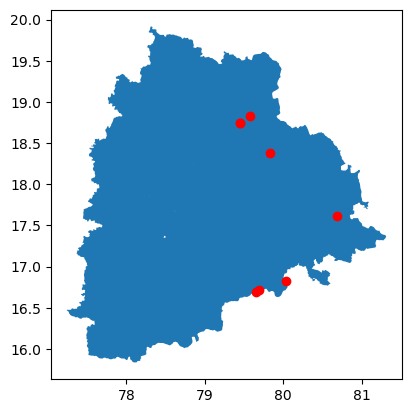

In [78]:
shape_telangana.plot()
plt.scatter(gdp_power_plants_tel.Longitude, gdp_power_plants_tel.Latitude, c='red')
plt.show()

In [174]:
df = pd.read_csv('data_tiffs.csv', index_col=0)
df['ModifiedDateTime'] = pd.to_datetime(df['ModifiedDateTime'])

In [184]:
df = pd.merge(df, power_plant_scores[['index', 'Year', 'PowP_score']], how='left', on=['index', 'Year'])

In [202]:
df_selected = df[['index', 'Mandal_Nam', 'Dist_Name', 'geometry', 'ModifiedDateTime', 'Year', 'Month', 'Season', 'NO2', 'PM2.5', 'SSM', 'SSM_median', 'SSM_min', 'SSM_max', 'SSM_percentile_90', 'PRE_mean', 'PRE_median', 'PRE_min', 'PRE_max', 'PRE_percentile_90', 'PRE_sum', 
    'POP_mean', 'POP_median', 'ST_mean', 'ST_median', 'ST_min', 'ST_max', 'ST_percentile_90', 'RWI_mean', 'RWI_median', 'RWI_min', 'RWI_max', 'RWI_percentile_90', 'AOT_mean', 'AOT_median', 'AOT_min', 'AOT_max', 'AOT_percentile_90',
    'BA_mean', 'BA_median', 'BA', 'Crops', 'Trees', 'Built Area', 'time_to_rur_median', 'PowP_score', 'Soil Type']]

In [207]:
df_selected = df_selected.rename(columns={'BA': 'BA_sum', 'SSM': 'SSM_mean'})

In [212]:
df_selected.columns

Index(['index', 'Mandal_Nam', 'Dist_Name', 'geometry', 'ModifiedDateTime',
       'Year', 'Month', 'Season', 'NO2', 'PM2.5', 'SSM_mean', 'SSM_median',
       'SSM_min', 'SSM_max', 'SSM_percentile_90', 'PRE_mean', 'PRE_median',
       'PRE_min', 'PRE_max', 'PRE_percentile_90', 'PRE_sum', 'POP_mean',
       'POP_median', 'ST_mean', 'ST_median', 'ST_min', 'ST_max',
       'ST_percentile_90', 'RWI_mean', 'RWI_median', 'RWI_min', 'RWI_max',
       'RWI_percentile_90', 'AOT_mean', 'AOT_median', 'AOT_min', 'AOT_max',
       'AOT_percentile_90', 'BA_mean', 'BA_median', 'BA_sum', 'Crops', 'Trees',
       'Built Area', 'time_to_rur_median', 'PowP_score', 'Soil Type'],
      dtype='object')

In [213]:
os.chdir('c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\analytics\\sandbox\\notebooks\\crop_fires\\Data_csv\\results_csv')
df_selected.to_csv('data_tiffs.csv')